这部分主要是实现RNN，并使用RNN做一个回归实验

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [3]:
TIME_STEP = 10  # rnn time step
INPUT_SIZE = 1  # rnn input size
LR = 0.02       # learning rate

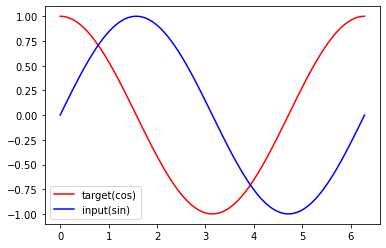

In [4]:
steps = np.linspace(0, np.pi * 2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target(cos)')
plt.plot(steps, x_np, 'b-', label='input(sin)')
plt.legend(loc='best')
plt.show()

In [5]:
steps

array([0.        , 0.06346652, 0.12693304, 0.19039956, 0.25386608,
       0.3173326 , 0.3807991 , 0.44426563, 0.50773215, 0.57119864,
       0.6346652 , 0.6981317 , 0.7615982 , 0.8250647 , 0.88853127,
       0.95199776, 1.0154643 , 1.0789309 , 1.1423973 , 1.2058638 ,
       1.2693304 , 1.3327969 , 1.3962634 , 1.4597299 , 1.5231965 ,
       1.586663  , 1.6501294 , 1.713596  , 1.7770625 , 1.8405291 ,
       1.9039955 , 1.9674621 , 2.0309286 , 2.0943952 , 2.1578617 ,
       2.221328  , 2.2847946 , 2.348261  , 2.4117277 , 2.4751942 ,
       2.5386608 , 2.6021273 , 2.6655939 , 2.7290602 , 2.7925267 ,
       2.8559933 , 2.9194598 , 2.9829264 , 3.046393  , 3.1098595 ,
       3.173326  , 3.2367923 , 3.3002589 , 3.3637254 , 3.427192  ,
       3.4906585 , 3.554125  , 3.6175916 , 3.6810582 , 3.7445245 ,
       3.807991  , 3.8714576 , 3.9349241 , 3.9983907 , 4.061857  ,
       4.125324  , 4.1887903 , 4.252257  , 4.3157234 , 4.37919   ,
       4.442656  , 4.5061226 , 4.569589  , 4.6330557 , 4.69652

In [26]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,
            num_layers=1,
            batch_first=True
        )
        self.out = nn.Linear(32, 1)
    
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [27]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [28]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()
h_state = None
plt.figure(1, figsize=(12, 5))
plt.ion()

<Figure size 864x360 with 0 Axes>

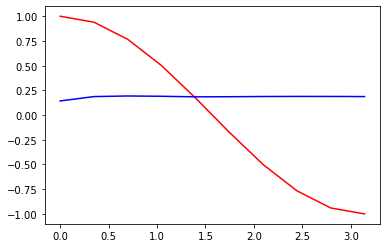

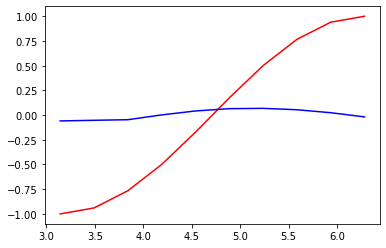

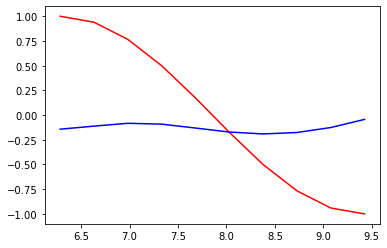

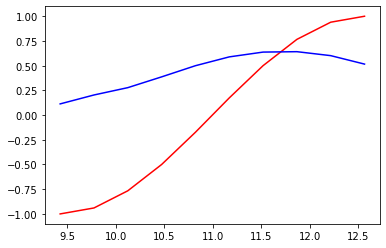

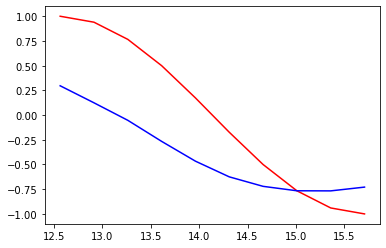

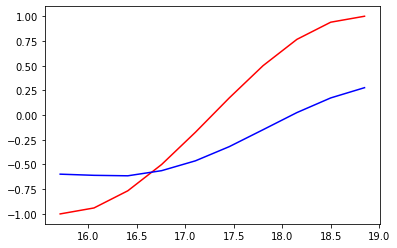

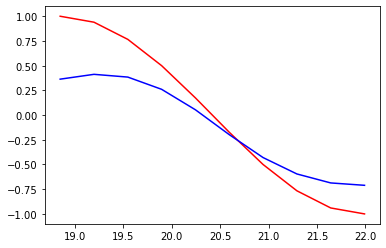

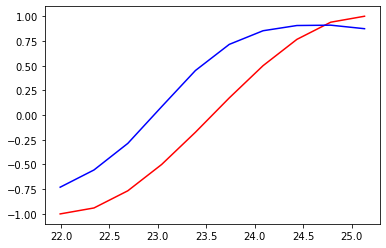

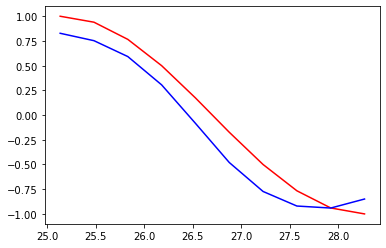

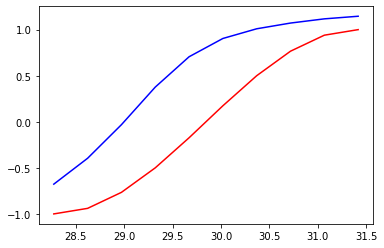

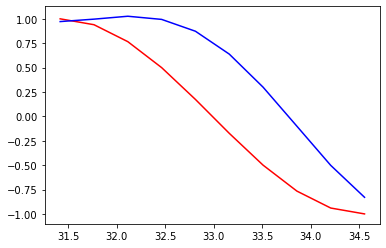

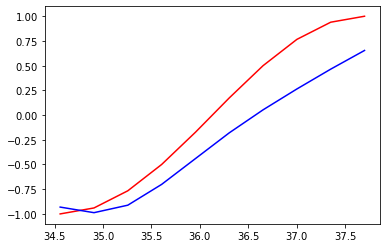

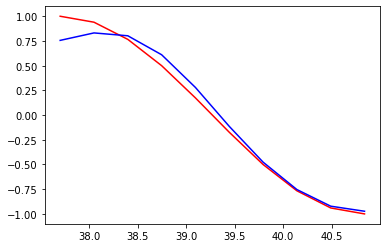

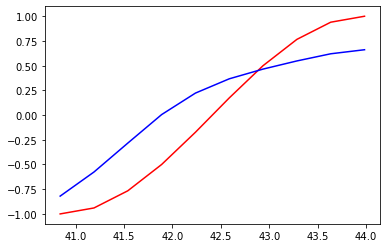

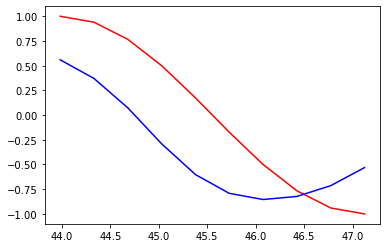

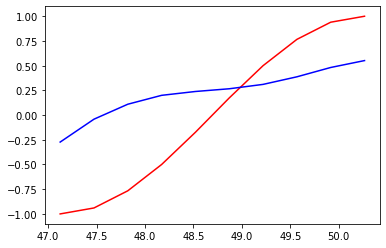

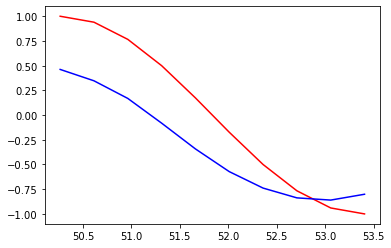

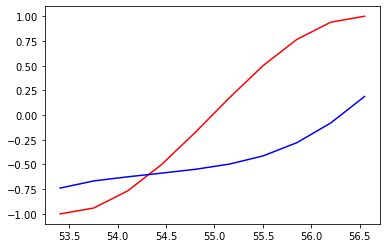

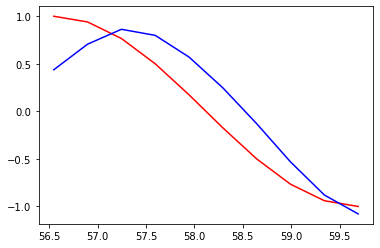

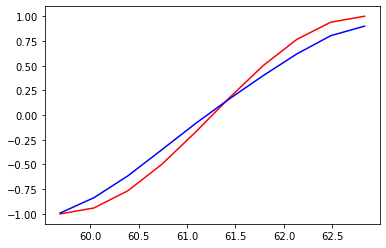

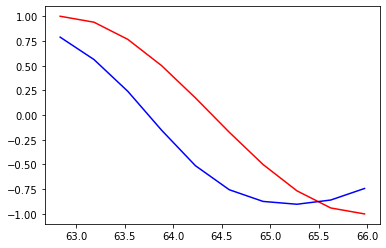

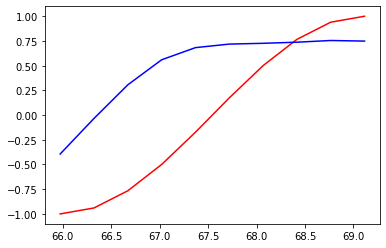

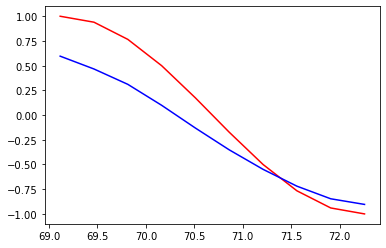

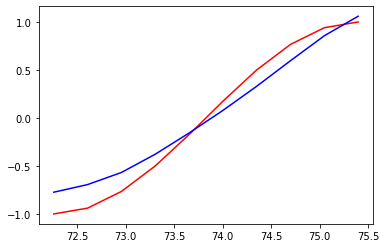

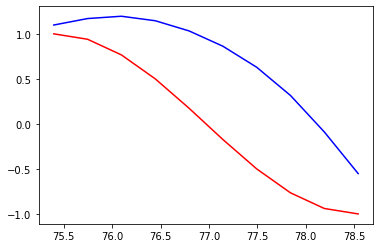

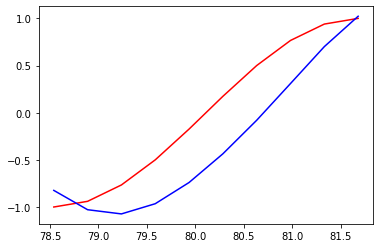

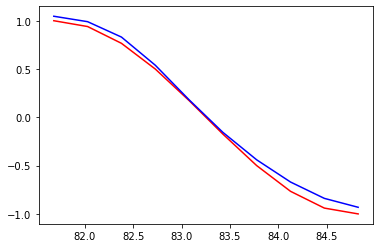

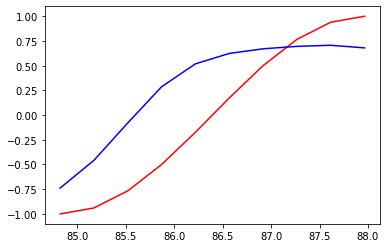

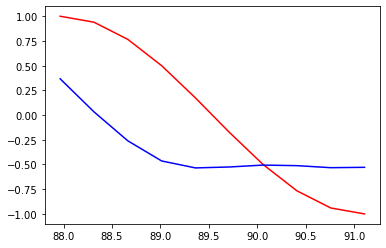

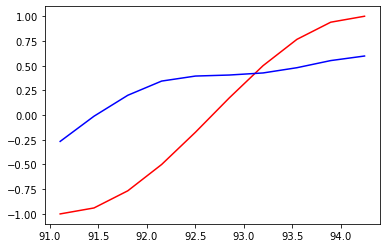

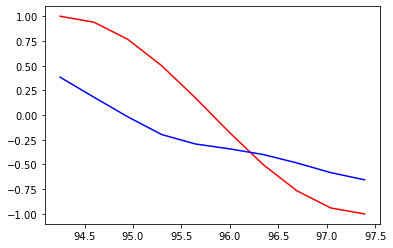

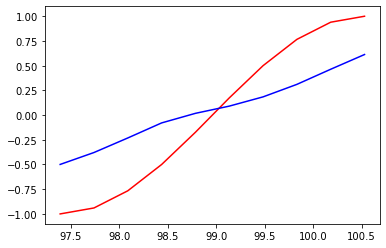

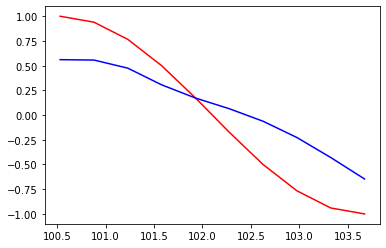

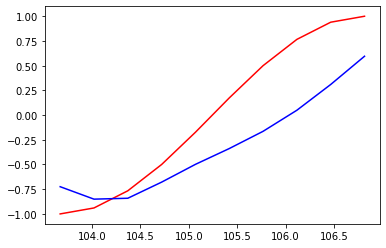

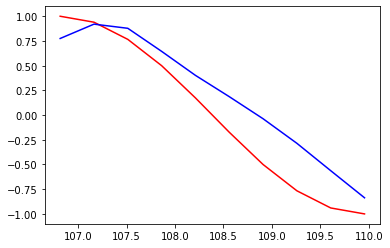

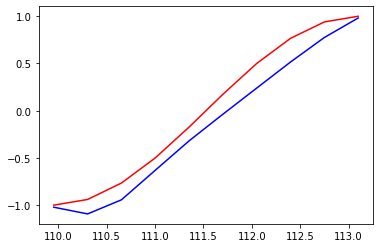

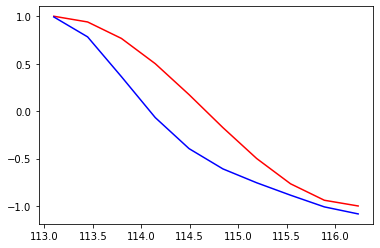

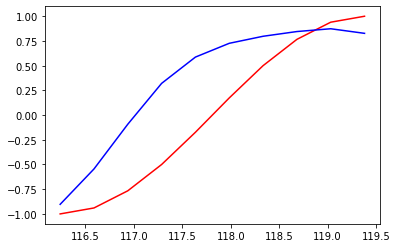

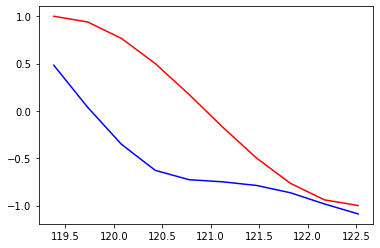

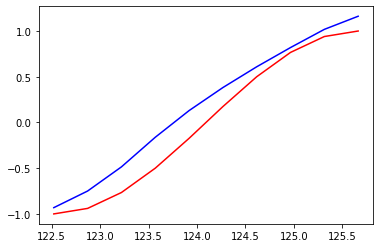

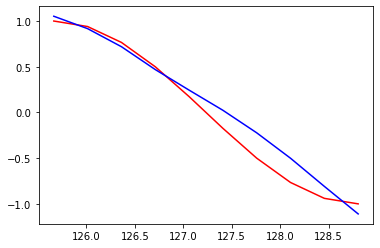

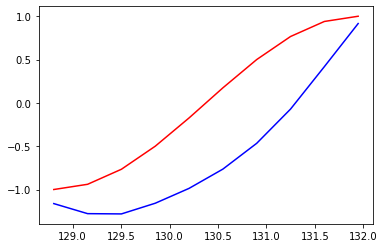

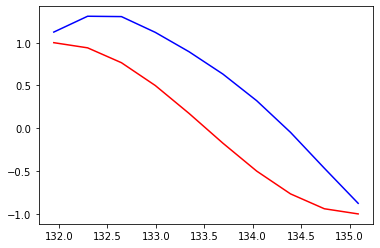

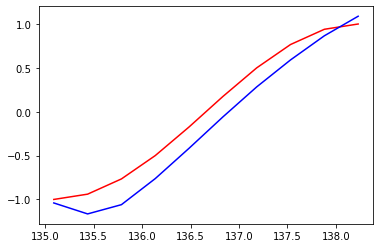

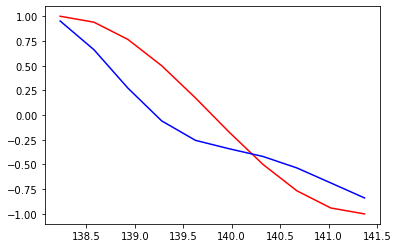

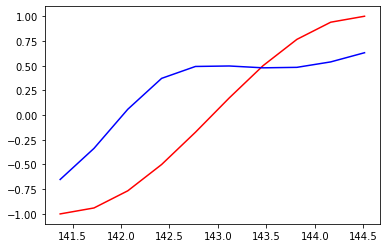

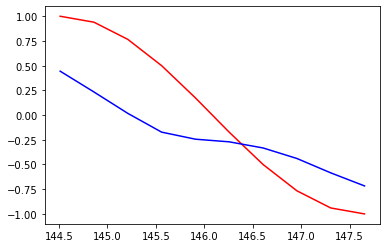

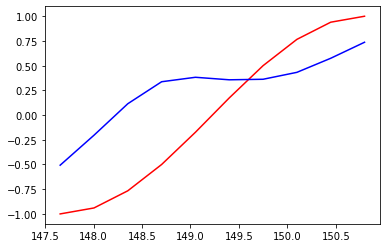

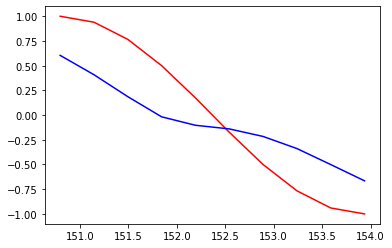

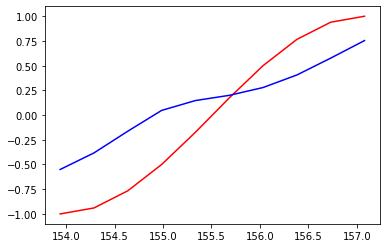

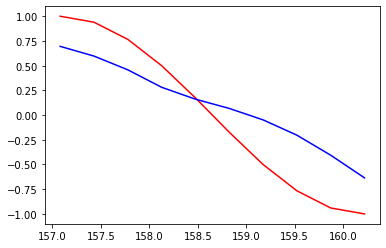

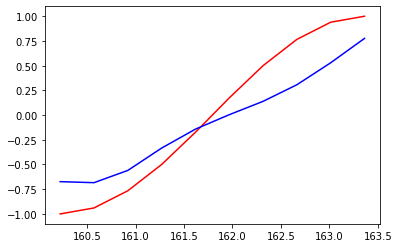

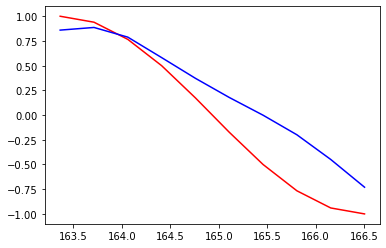

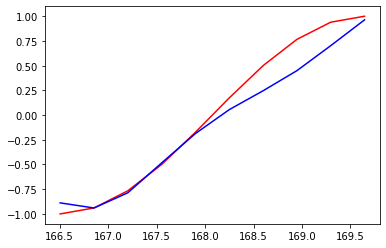

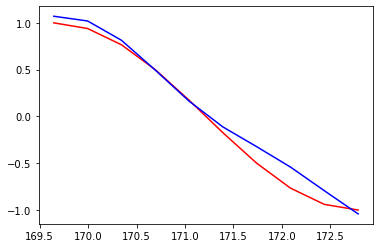

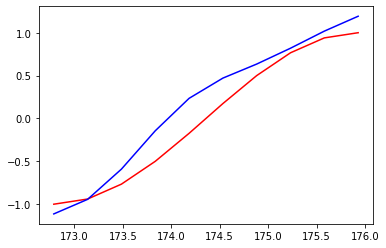

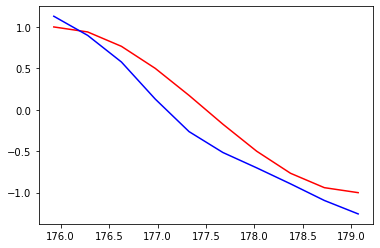

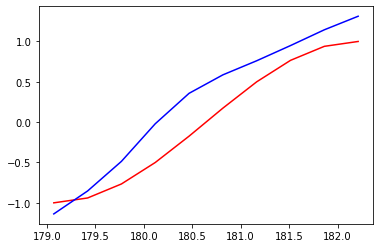

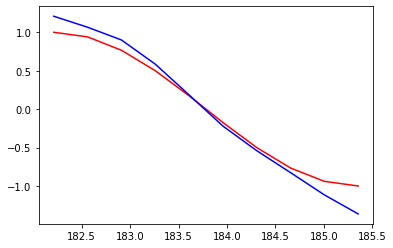

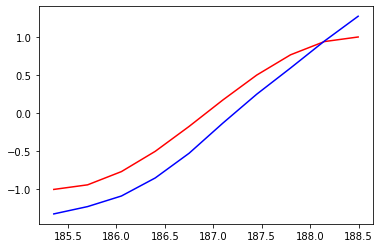

In [29]:
for step in range(60):
    start, end = step * np.pi, (step + 1) * np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    
    x_np = np.sin(steps)
    
    y_np = np.cos(steps)
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    prediction, h_state = rnn(x, h_state)
    h_state = Variable(h_state.data)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)